In [1]:
import osiris
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
%matplotlib inline

title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'34'}
plt.rc('font',size=20,family="serif")


## General dispersion relation

Consider two cold species, which we will generically label species 1 and species 2, each with constant drift velocity $\vec{v}_{0,1}$ and $\vec{v}_{0,2}$ and fluctuating velocity $\tilde{\vec{v}}_1$ and $\tilde{\vec{v}}_2$, respectively. The linearized Navier-Stokes equation for each species is then

$$ \frac{d}{d t} \tilde{\vec{v}}_s = \frac{\partial}{\partial t} \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}}. $$

In addition, the continuity equation for each species is

$$ \frac{\partial}{\partial t} \tilde{n}_s + n_{0,s} \nabla \cdot \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{n}_s = 0. $$

Poisson's equation then yields

$$ \nabla \cdot \tilde{\vec{E}} = 4\pi \sum_{s}q_s \tilde{n}_s. $$

If we assume a plane wave solution of the form $\tilde{\vec{E}} = \vec{E}_0 e^{i(\vec{k} \cdot \vec{r} - \omega t)}$, then the dynamical equation turns into

$$ (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})\tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}} \\
\Rightarrow \tilde{\vec{v}}_s = \frac{q_s \tilde{\vec{E}}}{i m_s (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})}. $$

Similarly, the continuity equation can be rewritten as

$$ -i\omega \tilde{n}_s + i n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s + i \vec{k} \cdot \vec{v}_{0,s} \tilde{n}_s = 0 \\
\Rightarrow \tilde{n}_s = \frac{n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s}{\omega - \vec{k} \cdot \vec{v}_{0,s}} = \frac{-q_s n_{0,s} \vec{k} \cdot \tilde{\vec{E}}}{i m_s (\omega - \vec{k} \cdot \vec{v}_{0,s})^2}. $$

If we substitute this expression for $\tilde{n}_s$ into Poisson's equation, after rearranging we find that

$$ \left(1 - \sum_s\frac{\omega_{p,s}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,s})^2}\right)i \vec{k} \cdot \tilde{\vec{E}} = 0. $$

Recognizing that $\nabla \cdot \tilde{\vec{D}} = \nabla \cdot (\epsilon \tilde{\vec{E}}) = \epsilon \vec{k} \cdot \tilde{\vec{E}}$, the term in parenthesis is then our dielectric constant. Setting this equal to zero gives the dispersion relation as

\begin{equation}
1 - \frac{\omega_{p,1}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,1})^2} - \frac{\omega_{p,2}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,2})^2} = 0. 
\end{equation}

This equation can be used for various types of two-stream instabilities, for which the parameters $\omega_{p,s}$ and $\vec{v}_{0,s}$ can be adjusted. Now let us consider the case where the two species are identical with opposite drift velocities of the same magnitude.

## Buneman instability

Consider a stationary background of ions with the electron plasma moving with a constant drift velocity $\vec{v}_0$. This could be produced, for example, by a current-carrying plasma. Then the dispersion relation is reduced to

$$ 
1 = \omega_{pe}^2 \left(\frac{m_e/m_i}{\omega^2} + \frac{1}{(\omega - \vec{k} \cdot \vec{v}_0)^2}\right).
$$ 

This quartic equation can be cast into a simpler form by defining $x \equiv \omega/\omega_{pe}$ and $\alpha \equiv \vec{k} \cdot \vec{v}_0/\omega_{pe}$ to get

$$ 
1 = \frac{m_e/m_i}{x^2} + \frac{1}{(x-\alpha)^2}.
$$ 

#### Parameters

From the above equation, it is seen that the two free parameters in the problem are the ratio of electron to ion mass, $m_e/m_i$, and $\alpha = \vec{k} \cdot \vec{v}_0/\omega_{pe}$, or simply the ratio $\vec{k} \cdot \vec{v}_0/n_0$.

#### Solution to the dispersion relation

If we define the right-hand side of the equation as

$$ 
f(x) = \frac{m_e/m_i}{x^2} + \frac{1}{(x-\alpha)^2},
$$ 

then we seek for solutions to $f(x) = 1$. In the below figure, we see that two of the roots for $\omega$ are always real, and the other two roots may be real or complex depending on the value of $\alpha$. To find when the $\omega$ roots begin to be complex, we seek to minimize $f(x)$. Setting $\frac{m_e}{m_i} \approx \frac{1}{1836}$ and solving $f'(x)=0$ yields $x_{min} \approx 0.75\alpha$. Then setting $f(x_{min}) \geq 1$ means that to have complex roots we need $\alpha \lesssim 1.12$. This is shown in the red curve in the below figure.

<img src="two_stream_disp.png">

If we let $\omega = \omega_R+i \omega_I$, then solving for $\omega_I$ gives the growth rate. The real and imaginary parts of the frequency are shown in the below figure.

<img src="omega_roots.png">

### The Buneman Instability does not have analytical solutions.   Theory curve is produced through root finding and constructing an interpolation function.  So we need to run the cell below:
    
    

In [12]:
from scipy.interpolate import interp1d

alpha=np.linspace(0,3,num=200)
rmass=1.0/100.0
growth_rate=osiris.buneman_growth_rate(alpha,rmass)

growth_rate_func=interp1d(alpha,np.abs(growth_rate),kind='cubic')

0j


## Here we produce the theory curve for our particular simulation, which has a beam velocity of 3 $\Delta x \omega_{pe}$.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


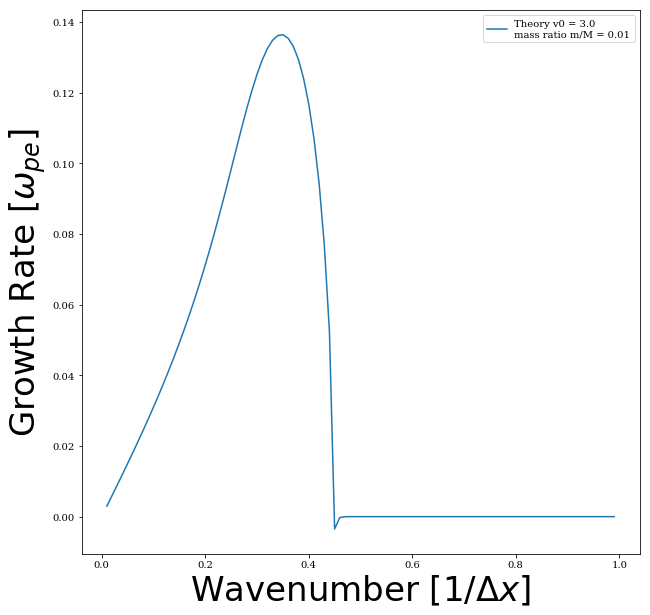

In [13]:
v0=3.0

c=1/100.0
karray=np.arange(0.01,1.0,0.01)
nk=49
growth_rate=np.zeros(nk)
growth_rate=growth_rate_func(karray*v0)
plt.figure(figsize=(10,10))
plt.plot(karray,growth_rate,label='Theory v0 = '+repr(v0)+'\n'+'mass ratio m/M = '+repr(c))

plt.xlabel('Wavenumber [$1/\Delta x$]',**axis_font)
plt.ylabel('Growth Rate [$\omega_{pe}$]',**axis_font)
plt.legend()
plt.show()

In [2]:
dirname = 'buneman'
osiris.run_upic_es(rundir=dirname,inputfile='buneman.txt')

combine_h5_2d completed normally
runbeps completed normally


/home/jovyan/work/M185-pre-Oct15/two-stream/buneman/Ex.h5


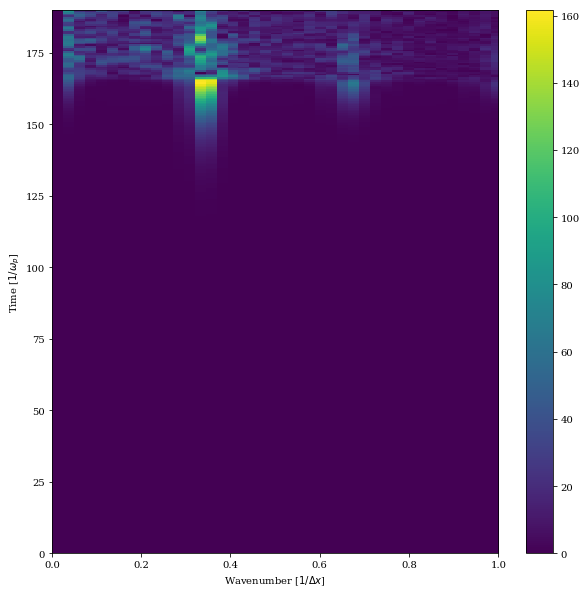

In [7]:
# read the history file, plot it vs time and space
from analysis import *
from h5_utilities import *
import os
workdir = os.getcwd()
dirname ='buneman'
filename=workdir+'/'+dirname+'/Ex.h5'
print(filename)
test4=read_hdf(filename)
# here we fourier analyze the data in space
#
# k_data=np.fft.fft(test.data,axis=1)
k_data=np.fft.fft(test4.data,axis=1)
# k_data_2=np.fft.fft(k_data,axis=0)

test4.data=np.abs(k_data)

test4.axes[0].axis_max=2.0*3.1415926


# test4.data=np.log10(np.real(test4.data)+1e-10)
plt.figure(figsize=(10,10))
plotme(test4)
plt.xlim(0,1)
plt.ylim(0,190)
plt.xlabel('Wavenumber [$1/\Delta x$]')
plt.ylabel('Time [$1/\omega_p$]')
# plt.ylim(0,50)
# plt.ylim(tlim[0],tlim[1])
plt.show()

## The most unstable mode occurs at mode 14, the theory agrees well for modes 8-14

Delta k = 0.0245436921875


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


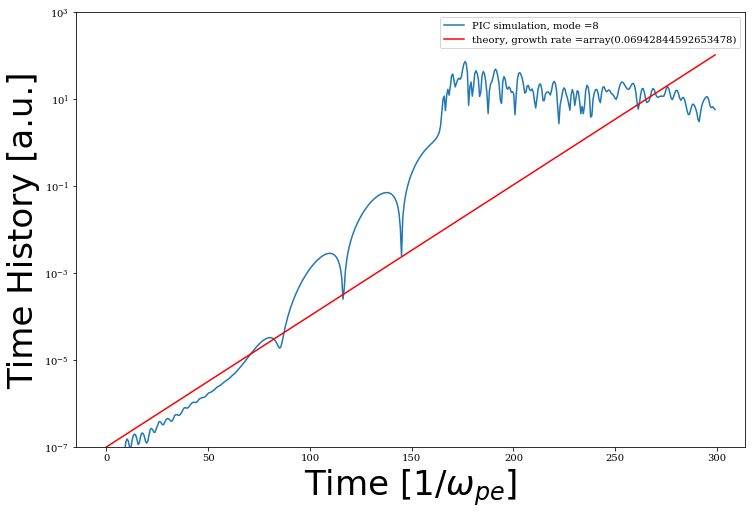

In [5]:
# This cell we try to compare data with theory:

nx=test4.data.shape[1]
nt=test4.data.shape[0]
# print(repr(nt))
dk=2*3.1415926/nx
print('Delta k = '+repr(dk))


# To compare with theory, just specify the mode you want to look at here
#
display_mode = 8
bracket = False
#
#

v0=3.0

alpha = v0 * dk * (display_mode)
# growth_rate = 0.0
# if (alpha<np.sqrt(2)): 
growth_rate=growth_rate_func(alpha)

taxis=np.linspace(0,test4.axes[1].axis_max,nt)
stream_theory=np.zeros(nt)
stream_theory_plus=np.zeros(nt)
stream_theory_minus=np.zeros(nt)
init_amplitude=1e-7
for it in range(0,nt):
    stream_theory[it]=init_amplitude*np.exp(growth_rate*taxis[it])
    stream_theory_plus[it]=init_amplitude*np.exp(1.15*growth_rate*taxis[it])
    stream_theory_minus[it]=init_amplitude*np.exp(0.85*growth_rate*taxis[it])

plt.figure(figsize=(12,8))
plt.semilogy(taxis,test4.data[:,display_mode],label='PIC simulation, mode ='+repr(display_mode))
plt.semilogy(taxis,stream_theory,'r',label='theory, growth rate ='+repr(growth_rate))

if (bracket):
    plt.semilogy(taxis,stream_theory_plus,'g.')

    plt.semilogy(taxis,stream_theory_minus,'g.')


plt.ylim((1e-7,1000))
plt.legend()
plt.xlabel('Time $[1/\omega_{pe}]$',**axis_font)
plt.ylabel('Time History [a.u.]', **axis_font)
  
    
plt.show()

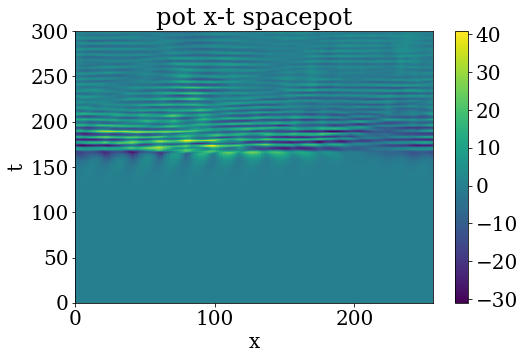

In [15]:
dirname = 'buneman'

#osiris.plot_wk_arb(rundir=dirname, field='pot', TITLE='potential',wlim=4, klim=3)
osiris.plot_xt_arb(rundir=dirname, field='pot',tlim=[0,300] )

## Finally, let's look at the electron phase space.

In [14]:
dirname='buneman'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=37, description='n', max=74), Output()), _dom_classes=('widget-interact',))